<a href="https://colab.research.google.com/github/navya3006/Building-an-EDA-model-for-an-e-commerce-platform-supply-chain/blob/main/Flipkart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_column',None)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/DataCoSupplyChainDataset.csv",encoding = 'latin1')
df.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [ ]:
df.shape

(180519, 53)

In [ ]:
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [ ]:
df.duplicated().sum()

0

In [ ]:
customer_demographic = df[['Customer Id','Category Id', 'Customer Fname', 'Customer Lname', 'Customer Email',
                           'Customer City', 'Customer Country', 'Customer State', 'Customer Street',
                           'Customer Zipcode', 'Customer Segment']]

order_info = df[['Order Id','Product Card Id', 'Order Customer Id', 'order date (DateOrders)',
                 'Order Status', 'Order Region', 'Order State', 'Order City', 'Order Country',
                 'shipping date (DateOrders)', 'Shipping Mode','Days for shipping (real)','Days for shipment (scheduled)']]

product_info = df[['Product Card Id','Order Item Id', 'Product Category Id', 'Product Description',
                   'Product Image', 'Product Name', 'Product Price', 'Product Status']]

order_item_info = df[['Order Item Id', 'Order Item Cardprod Id', 'Order Item Discount',
                      'Order Item Discount Rate', 'Order Item Product Price',
                      'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
                      'Order Item Total', 'Order Profit Per Order']]

location_info = df[['Product Card Id','Latitude', 'Longitude', 'Market', 'Department Id', 'Department Name']]

sales_info = df[['Type','Benefit per order','Sales per customer','Delivery Status',
                 'Late_delivery_risk','Category Id','Category Name']]

In [ ]:
customer_demographic.head()

,Customer Id,Category Id,Customer Fname,Customer Lname,Customer Email,Customer City,Customer Country,Customer State,Customer Street,Customer Zipcode,Customer Segment
0,20755,73,Cally,Holloway,XXXXXXXXX,Caguas,Puerto Rico,PR,5365 Noble Nectar Island,725.0,Consumer
1,19492,73,Irene,Luna,XXXXXXXXX,Caguas,Puerto Rico,PR,2679 Rustic Loop,725.0,Consumer
2,19491,73,Gillian,Maldonado,XXXXXXXXX,San Jose,EE. UU.,CA,8510 Round Bear Gate,95125.0,Consumer
3,19490,73,Tana,Tate,XXXXXXXXX,Los Angeles,EE. UU.,CA,3200 Amber Bend,90027.0,Home Office
4,19489,73,Orli,Hendricks,XXXXXXXXX,Caguas,Puerto Rico,PR,8671 Iron Anchor Corners,725.0,Corporate


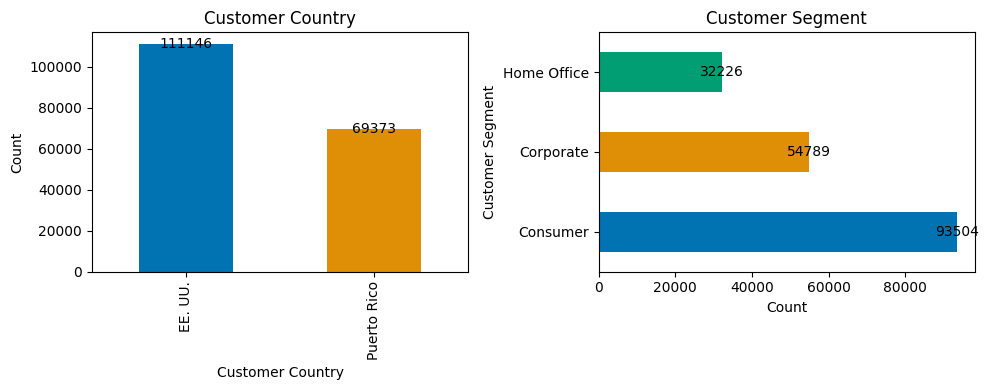

In [ ]:
# Set color blind-friendly color palette
color_palette = sns.color_palette('colorblind')

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot for 'Customer Country'
customer_demographic['Customer Country'].value_counts().plot(kind='bar', ax=axes[0], title='Customer Country', color=color_palette)
axes[0].set_xlabel('Customer Country')  # X-axis label
axes[0].set_ylabel('Count')  # Y-axis label
for p in axes[0].patches:
    axes[0].annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

# Plot for 'Customer Segment'
customer_demographic['Customer Segment'].value_counts().plot(kind='barh', ax=axes[1], title='Customer Segment', color=color_palette)
axes[1].set_xlabel('Count')  # X-axis label
axes[1].set_ylabel('Customer Segment')  # Y-axis label
for p in axes[1].patches:
    axes[1].annotate(str(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2.), ha='center', va='center')

# Adjust layout for better spacing
plt.tight_layout(pad=1.08)

plt.show()

In [ ]:
order_info.head()

,Order Id,Product Card Id,Order Customer Id,order date (DateOrders),Order Status,Order Region,Order State,Order City,Order Country,shipping date (DateOrders),Shipping Mode,Days for shipping (real),Days for shipment (scheduled)
0,77202,1360,20755,1/31/2018 22:56,COMPLETE,Southeast Asia,Java Occidental,Bekasi,Indonesia,2/3/2018 22:56,Standard Class,3,4
1,75939,1360,19492,1/13/2018 12:27,PENDING,South Asia,Rajastán,Bikaner,India,1/18/2018 12:27,Standard Class,5,4
2,75938,1360,19491,1/13/2018 12:06,CLOSED,South Asia,Rajastán,Bikaner,India,1/17/2018 12:06,Standard Class,4,4
3,75937,1360,19490,1/13/2018 11:45,COMPLETE,Oceania,Queensland,Townsville,Australia,1/16/2018 11:45,Standard Class,3,4
4,75936,1360,19489,1/13/2018 11:24,PENDING_PAYMENT,Oceania,Queensland,Townsville,Australia,1/15/2018 11:24,Standard Class,2,4


In [ ]:
order_info['order date (DateOrders)'] = pd.to_datetime(order_info['order date (DateOrders)'])
order_info['shipping date (DateOrders)'] = pd.to_datetime(order_info['shipping date (DateOrders)'])

In [ ]:
min_order = order_info['order date (DateOrders)'].min()
max_order =order_info['order date (DateOrders)'].max()
print(f'first order : {min_order}')
print(f'last order : {max_order}')

first order : 2015-01-01 00:00:00
last order : 2018-01-31 23:38:00


In [ ]:
new_column={
    'Days for shipment (scheduled)' : 'Expected Shipping',
    'Days for shipping (real)' : 'Actual Shipping',
    }
order_info.rename(new_column,axis = 1, inplace = True)

In [ ]:
order_info['shiping_var']= order_info['Expected Shipping']- order_info['Actual Shipping']

In [ ]:
early=order_info[order_info['shiping_var']>0]['shiping_var'].mean()
delay = order_info[order_info['shiping_var']<0]['shiping_var'].abs().mean()

print(f'Avg Early Shipping Days: {early}')
print(f'Avg Delay Shipping Days: {delay}')

Avg Early Shipping Days: 1.499607987824563
Avg Delay Shipping Days: 1.6167408123791103


In [ ]:
max_delay = order_info[order_info['shiping_var']<0]\
    .sort_values(by ='shiping_var', ascending = True)['shiping_var'].abs().head(1)

print(f'Max Delay: {max_delay} Days')

Max Delay: 111965    4
Name: shiping_var, dtype: int64 Days


In [ ]:
average_lead_time = order_info['Actual Shipping'].mean().round()

print(f'Average Lead Time: {average_lead_time} days')

Average Lead Time: 3.0 days


In [ ]:
country = order_info['Order Country'].nunique()
print(f'Number Of Country : {country}')

Number Of Country : 164


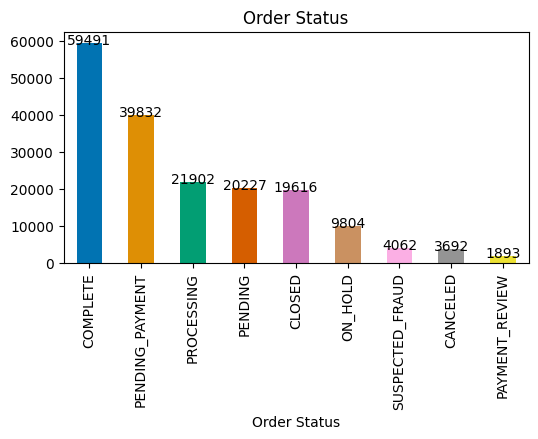

In [ ]:
# Set color blind-friendly color palette
color_palette = sns.color_palette('colorblind')

# Plot 'Order Status' with color blind palette and data labels
ax = order_info['Order Status'].value_counts().plot(kind='bar', figsize=(6, 3), title='Order Status', color=color_palette)

# Add data labels inside the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 2), textcoords='offset points')

# Show the plot
plt.show()


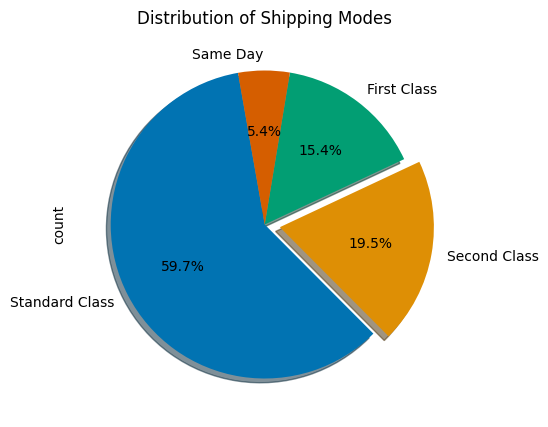

In [ ]:
# Set color blind-friendly color palette
color_palette = sns.color_palette('colorblind')

# Plot 'Shipping Mode' as a pie chart with color blind palette and explosion
shipping_mode = order_info['Shipping Mode'].value_counts()
explode = (0, 0.1, 0, 0)  # Adjust the explosion for emphasis on a slice

shipping_mode.plot(kind='pie', autopct='%1.1f%%', startangle=100, figsize=(5, 5),
                   colors=color_palette, explode=explode, shadow=True)

plt.title('Distribution of Shipping Modes')

# Display the plot
plt.show()


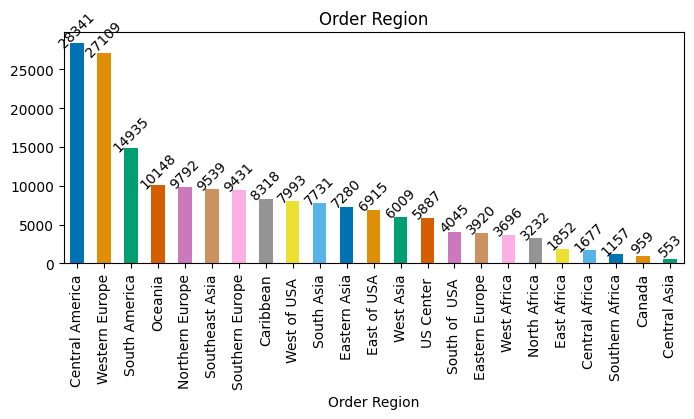

In [ ]:
# Set color blind-friendly color palette
color_palette = sns.color_palette('colorblind')

# Plot 'Order Region' as a bar chart with color blind palette
order_region_counts = order_info['Order Region'].value_counts()
ax = order_region_counts.plot(kind='bar', figsize=(8, 3), color=color_palette, title='Order Region')

# Add data labels inside the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',rotation=45)

# Display the plot
plt.show()

In [ ]:
order_info['day'] =order_info['order date (DateOrders)'].dt.dayofweek

In [ ]:
order_info.day.replace([0,1,2,3,4,5,6],["monday","tuesday","wednesday","thursday","friday","saturday","sunday"],inplace=True)

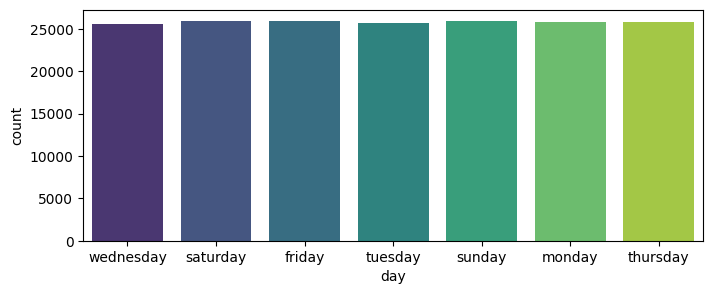

In [ ]:
plt.figure(figsize=(8, 3))
sns.countplot(x= 'day',data = order_info,palette='viridis');

In [ ]:
order_info['month'] =order_info['order date (DateOrders)'].dt.month
order_info["year"] = order_info['order date (DateOrders)'].dt.year

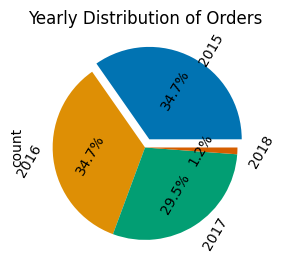

In [ ]:
# Set color blind-friendly color palette
color_palette = sns.color_palette('colorblind')

# Plot 'year' as a pie chart with color blind palette
year_over_years_orders = order_info["year"].value_counts()
explode = (0.1, 0, 0, 0)  # Explode the first slice (optional)

# Plot the pie chart
ax = year_over_years_orders.plot(kind='pie', figsize=(4, 3), autopct='%1.1f%%', colors=color_palette, explode=explode)

# Rotate the year values
for text in ax.texts:
    text.set_rotation(60)

# Set a title
plt.title('Yearly Distribution of Orders')

# Display the plot
plt.show()

In [ ]:
not_include_2018 = order_info.query("year == 2015 or year == 2016 or year == 2017")
not_include_2018['order date (DateOrders)'].max()

Timestamp('2017-12-31 23:52:00')

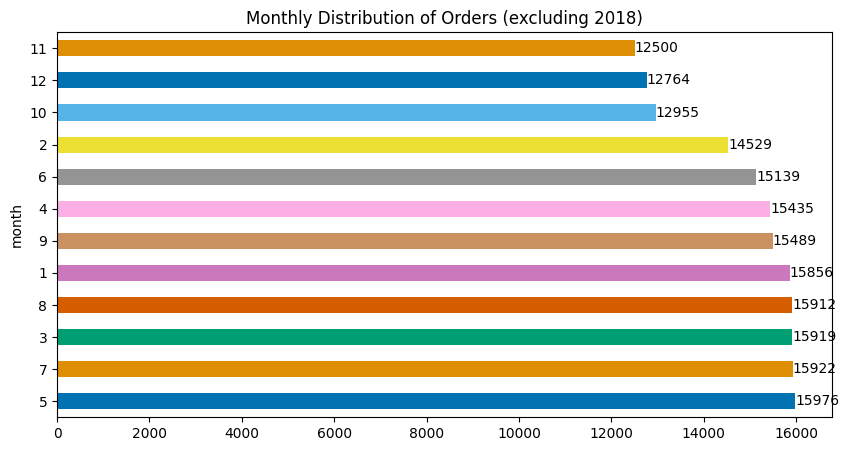

In [ ]:
# Set color blind-friendly color palette and figure size
color_palette = sns.color_palette('colorblind')
plt.figure(figsize=(10,5))

# Plot 'month' as a horizontal bar chart with color blind palette
ax = not_include_2018['month'].value_counts().plot(kind='barh', color=color_palette)

# Add data labels
for index, value in enumerate(not_include_2018['month'].value_counts()):
    ax.text(value, index, str(value), ha='left', va='center')

# Set a title
plt.title('Monthly Distribution of Orders (excluding 2018)')

# Display the plot
plt.show()

In [ ]:
product_info.head()

,Product Card Id,Order Item Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status
0,1360,180517,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0
1,1360,179254,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0
2,1360,179253,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0
3,1360,179252,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0
4,1360,179251,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0


In [ ]:
Products= product_info['Product Name'].nunique()

print(f'Number Of Products: {Products}')

Number Of Products: 118


In [ ]:
product_info['Product Price'].describe()

count    180519.000000
mean        141.232550
std         139.732492
min           9.990000
25%          50.000000
50%          59.990002
75%         199.990005
max        1999.989990
Name: Product Price, dtype: float64

In [ ]:
product_info['Product Status'].sum()

0

In [ ]:
order_item_info.head()

,Order Item Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order
0,180517,1360,13.110000,0.04,327.75,0.29,1,327.75,314.640015,91.250000
1,179254,1360,16.389999,0.05,327.75,-0.80,1,327.75,311.359985,-249.089996
2,179253,1360,18.030001,0.06,327.75,-0.80,1,327.75,309.720001,-247.779999
3,179252,1360,22.940001,0.07,327.75,0.08,1,327.75,304.809998,22.860001
4,179251,1360,29.500000,0.09,327.75,0.45,1,327.75,298.250000,134.210007


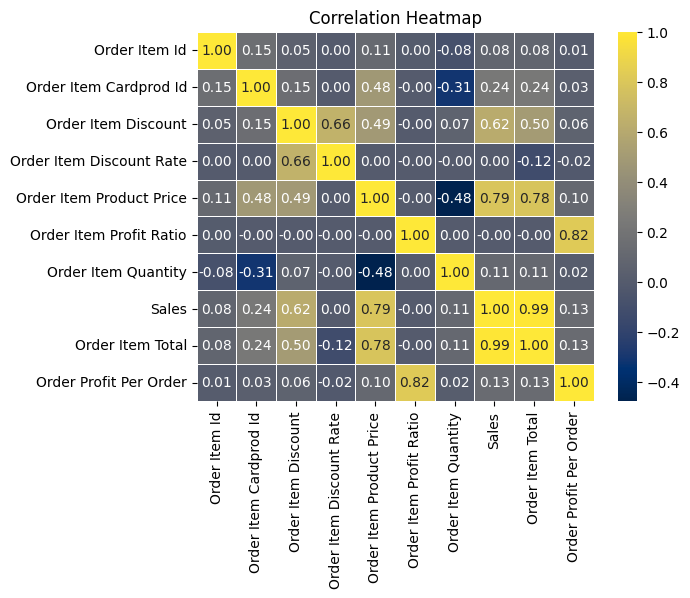

In [ ]:
# Calculate correlation matrix
corr = order_item_info.corr()

# Set color blind-friendly color palette (using 'cividis')
color_palette = 'cividis'

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap=color_palette, fmt=".2f", linewidths=.5)

# Set title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


In [ ]:
order_item_info['Order Item Id'].duplicated().sum()

0

In [ ]:
order_item_info["Net Income"] = np.where(order_item_info['Order Profit Per Order'] > 0, "Profit",
                                             np.where(order_item_info['Order Profit Per Order'] < 0, "Loss", "No Profit"))

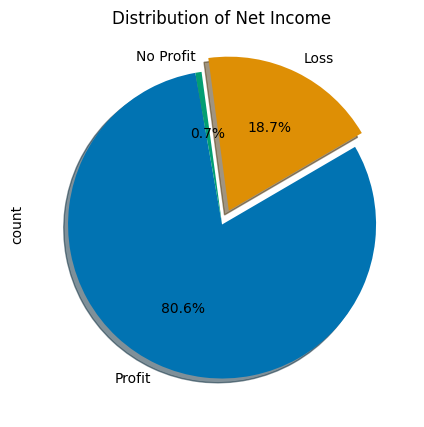

In [ ]:
# Set color blind-friendly color palette
color_palette = sns.color_palette('colorblind')

# Plot 'Shipping Mode' as a pie chart with color blind palette and explosion
net_income = order_item_info['Net Income'].value_counts()
explode = (0, 0.1, 0)  # Adjust the explosion for emphasis on a slice

net_income.plot(kind='pie', autopct='%1.1f%%', startangle=100, figsize=(5, 5),
                   colors=color_palette, explode=explode, shadow=True)

plt.title('Distribution of Net Income')

# Display the plot
plt.show()

In [ ]:
location_info.head()

,Product Card Id,Latitude,Longitude,Market,Department Id,Department Name
0,1360,18.251453,-66.037056,Pacific Asia,2,Fitness
1,1360,18.279451,-66.037064,Pacific Asia,2,Fitness
2,1360,37.292233,-121.881279,Pacific Asia,2,Fitness
3,1360,34.125946,-118.291016,Pacific Asia,2,Fitness
4,1360,18.253769,-66.037048,Pacific Asia,2,Fitness


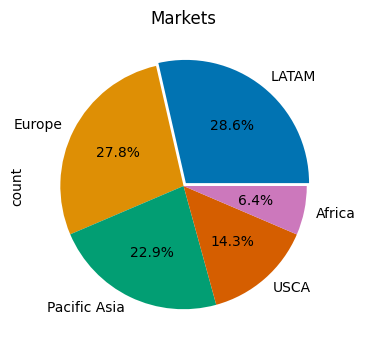

In [ ]:
# Set color blind-friendly color palette
color_palette = sns.color_palette('colorblind')

# Define data
explode = (0.03, 0, 0, 0, 0)
location_info['Market'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(4, 4),
                                              colors=color_palette, explode=explode)

plt.title('Markets')

# Show the plot
plt.show()


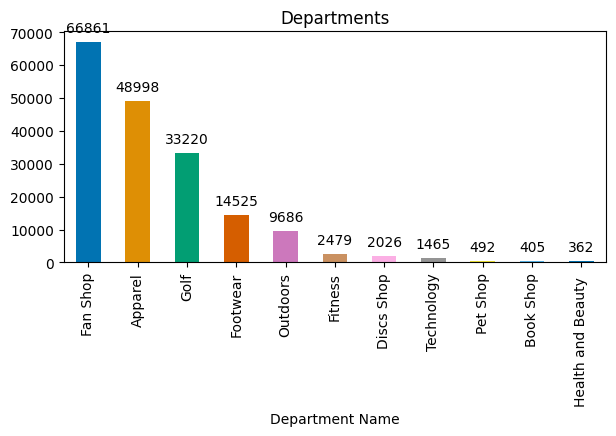

In [ ]:
# Set color blind-friendly color palette
color_palette = sns.color_palette('colorblind')

# Plot the bar chart
ax = location_info['Department Name'].value_counts().plot(kind='bar', figsize=(7, 3), color=color_palette)

# Add data labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Departments')

# Show the plot
plt.show()


In [ ]:
sales_info.head()

,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name
0,DEBIT,91.250000,314.640015,Advance shipping,0,73,Sporting Goods
1,TRANSFER,-249.089996,311.359985,Late delivery,1,73,Sporting Goods
2,CASH,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods
3,DEBIT,22.860001,304.809998,Advance shipping,0,73,Sporting Goods
4,PAYMENT,134.210007,298.250000,Advance shipping,0,73,Sporting Goods


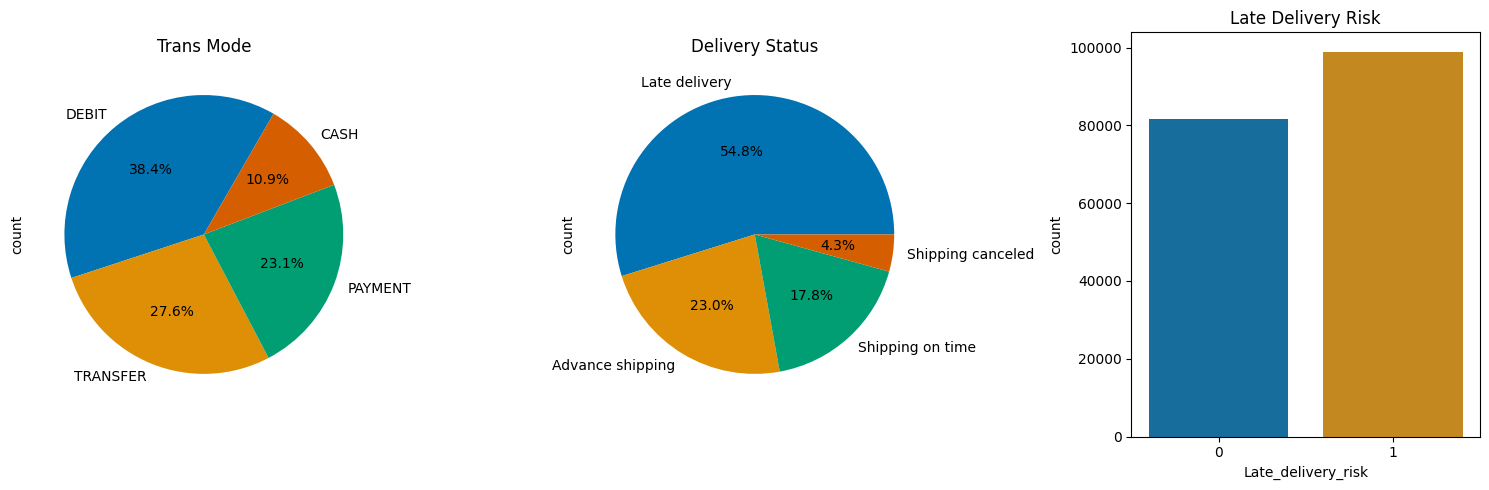

In [ ]:
# Set color blind-friendly color palette
color_palette = sns.color_palette('colorblind')

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first pie chart for 'Type'
sales_info['Type'].value_counts().plot(kind='pie', startangle=60, autopct='%1.1f%%', ax=axs[0], colors=color_palette)
axs[0].set_title('Trans Mode')

# Plot the second pie chart for 'Delivery Status'
sales_info['Delivery Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axs[1], colors=color_palette)
axs[1].set_title('Delivery Status')

# Plot the countplot for 'Late_delivery_risk'
sns.countplot(x='Late_delivery_risk', data=sales_info, ax=axs[2], palette=color_palette)
axs[2].set_title('Late Delivery Risk')

plt.tight_layout(pad=1.08)
plt.show()


In [ ]:
sales_info['Category Name'].nunique()

50

Quantitative Vs Qualitative

In [ ]:
new_df= df[['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk',
            #'Category Id',
            'Category Name', 'Customer City',
       'Customer Country',
            #'Customer Email', 'Customer Fname',
            #'Customer Id',
       #'Customer Lname', 'Customer Password',
            'Customer Segment',
       #'Customer State', 'Customer Street', 'Customer Zipcode',
       #'Department Id',
            'Department Name', 'Latitude', 'Longitude', 'Market',
       #'Order City',
            'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', #'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       #'Order Zipcode', 'Product Card Id', 'Product Category Id',
       #'Product Description', 'Product Image',
            'Product Name', 'Product Price',
       #'Product Status',
            'shipping date (DateOrders)', 'Shipping Mode']].copy()
new_df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Segment,Department Name,Latitude,Longitude,Market,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Consumer,Fitness,18.251453,-66.037056,Pacific Asia,Indonesia,20755,1/31/2018 22:56,77202,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,Smart watch,327.75,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,Consumer,Fitness,18.279451,-66.037064,Pacific Asia,India,19492,1/13/2018 12:27,75939,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,Smart watch,327.75,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,Consumer,Fitness,37.292233,-121.881279,Pacific Asia,India,19491,1/13/2018 12:06,75938,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,Smart watch,327.75,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,Home Office,Fitness,34.125946,-118.291016,Pacific Asia,Australia,19490,1/13/2018 11:45,75937,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,Smart watch,327.75,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Corporate,Fitness,18.253769,-66.037048,Pacific Asia,Australia,19489,1/13/2018 11:24,75936,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,Smart watch,327.75,1/15/2018 11:24,Standard Class


In [ ]:
plt.figure(figsize=(10,8))
new_df_corr=new_df.corr()

sns.heatmap(new_df_corr,annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap');

ValueError: could not convert string to float: 'DEBIT'

<Figure size 1000x800 with 0 Axes>

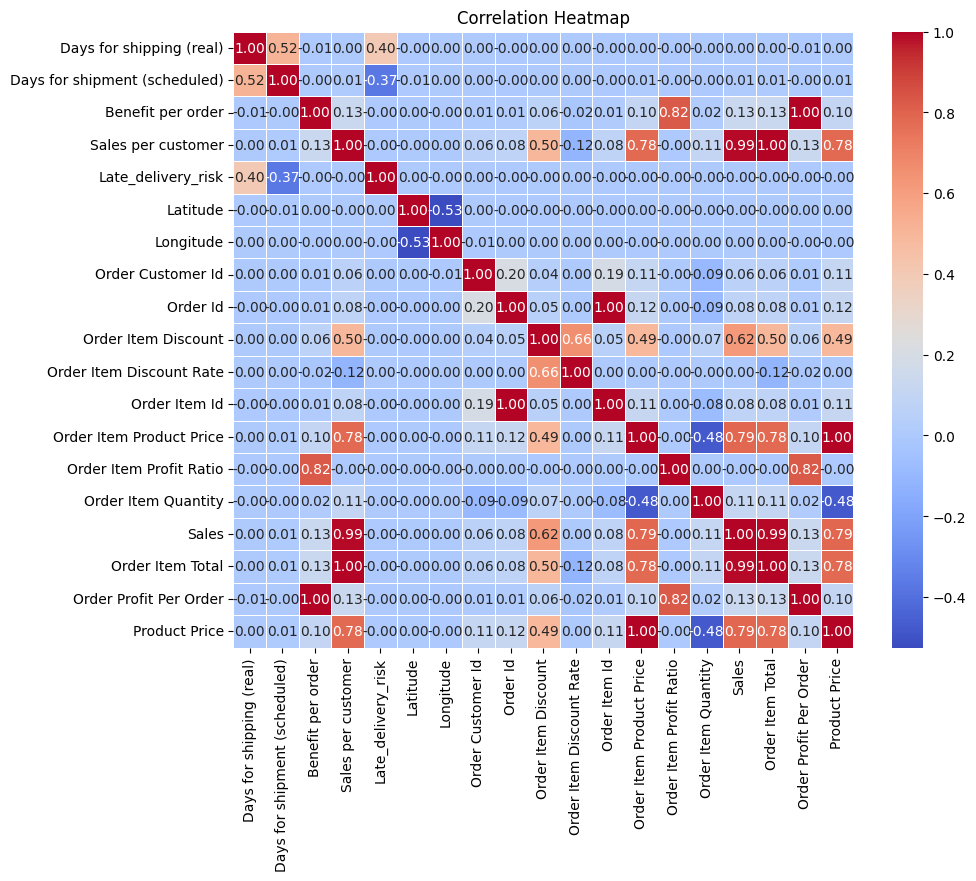

In [ ]:
# Restore the original corr function (if you need it)
del corr

# Select only numeric columns for correlation calculation
numeric_df = new_df.select_dtypes(include=['number'])

plt.figure(figsize=(10,8))
new_df_corr = numeric_df.corr()

sns.heatmap(new_df_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap');

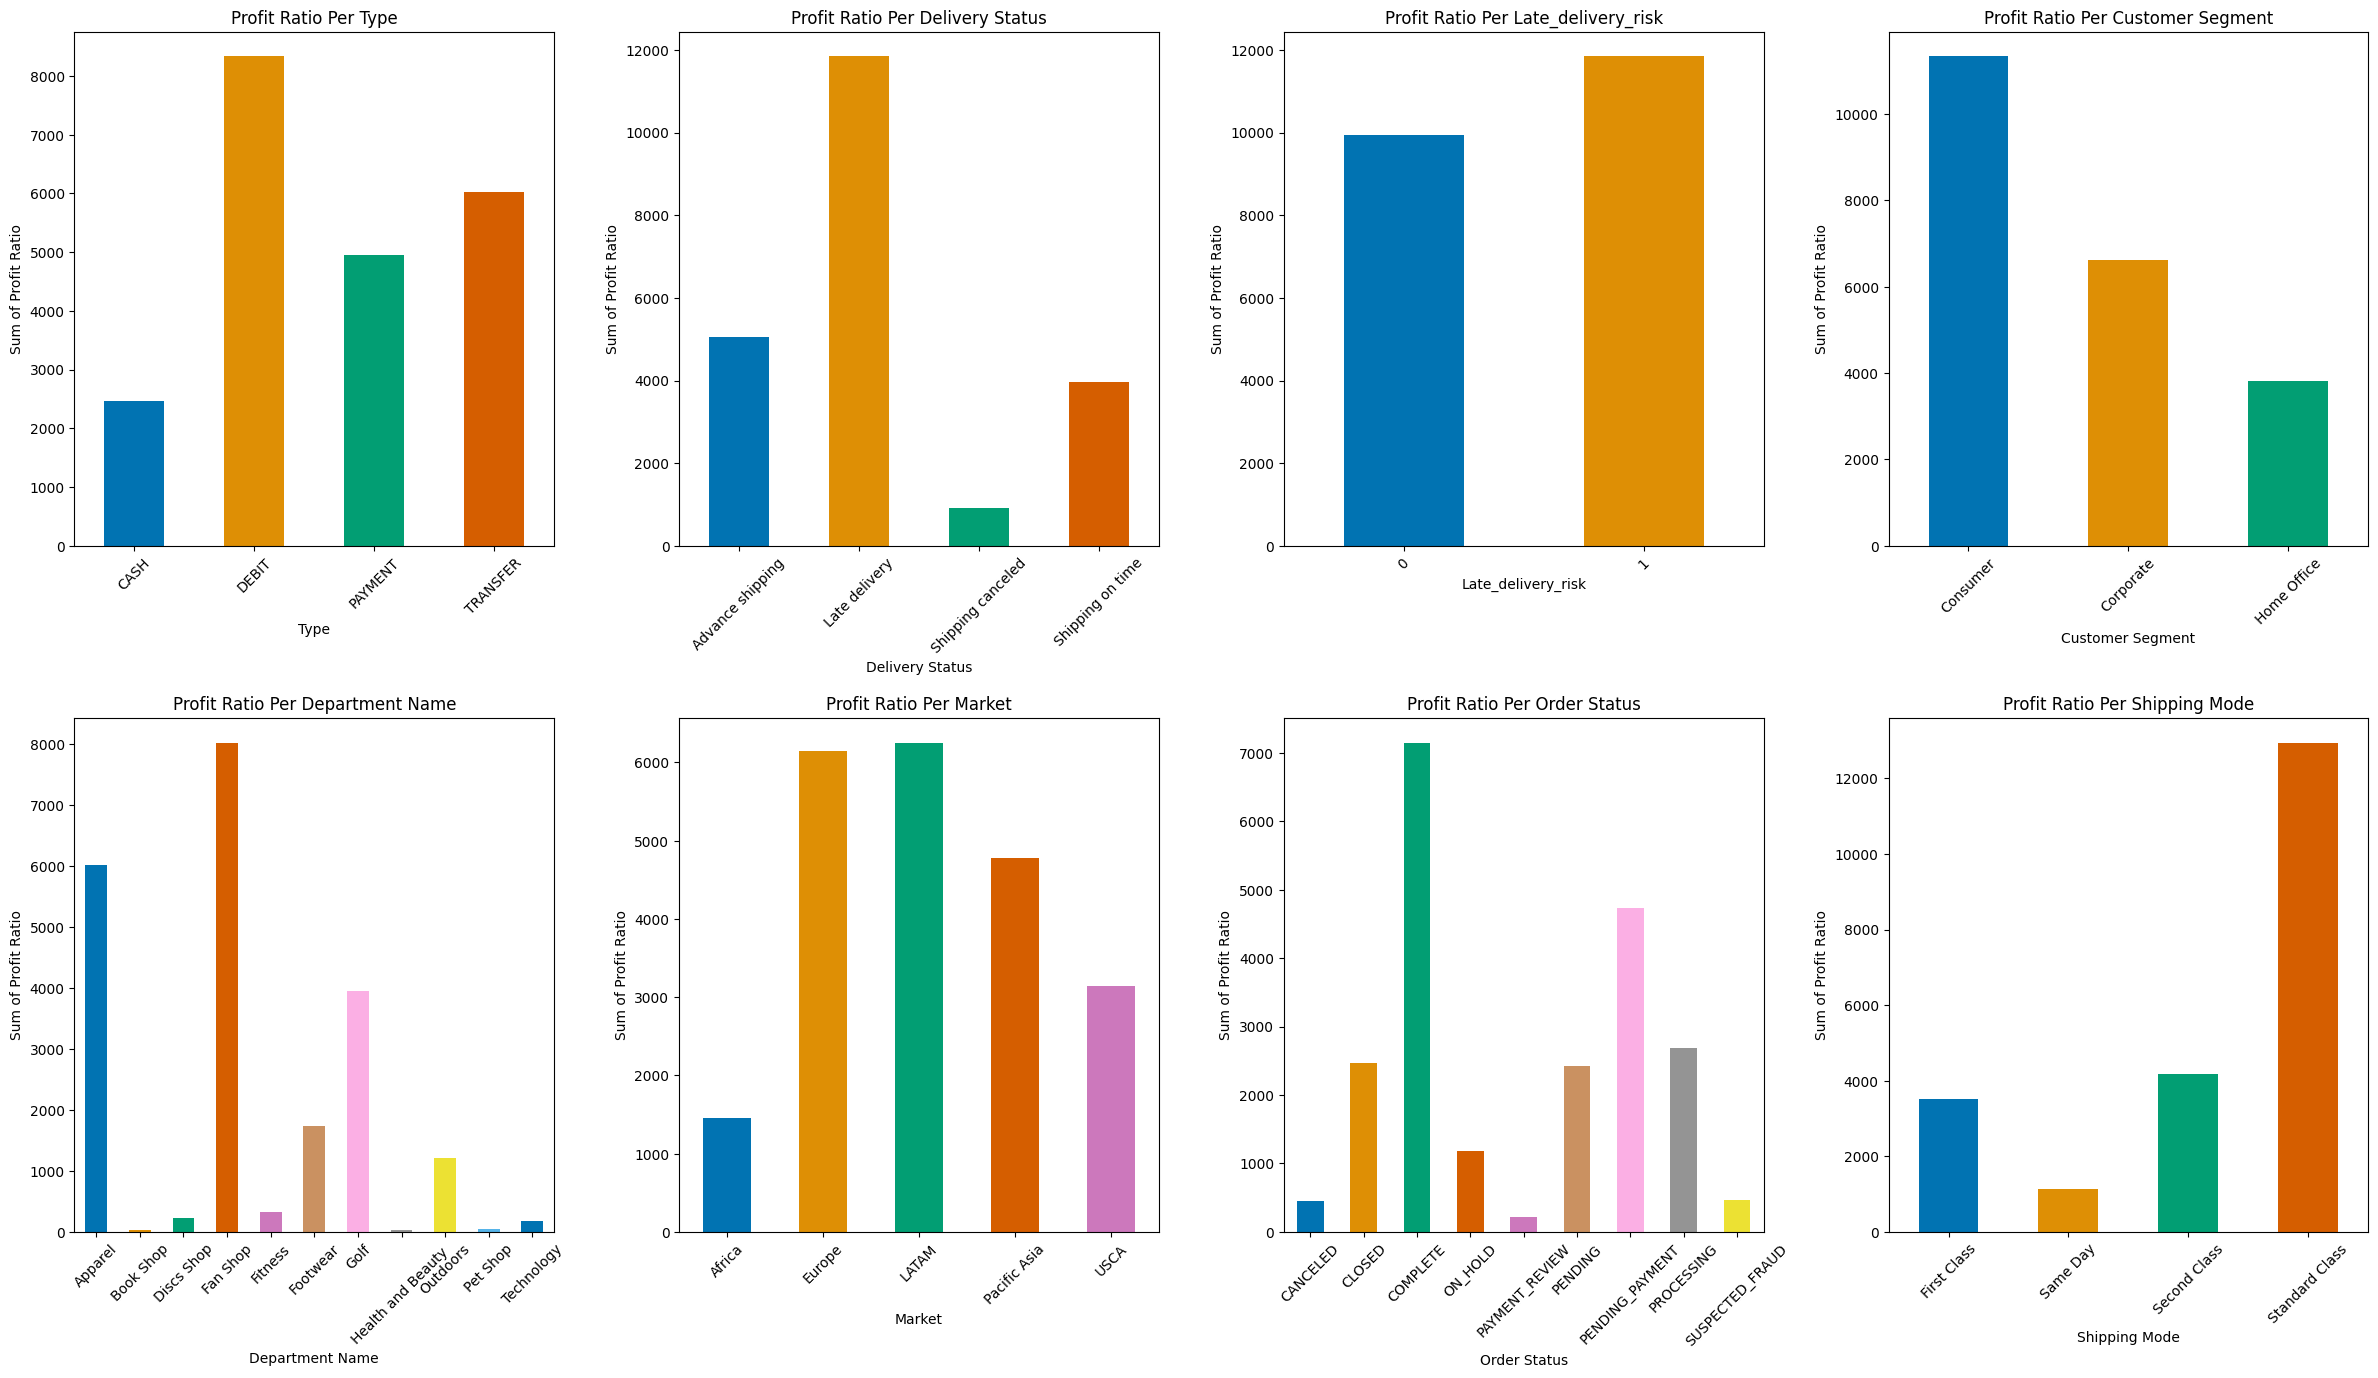

In [ ]:
# Set color blind-friendly color palette
color_palette = sns.color_palette('colorblind')

# Define the list of categorical columns
categorical_columns = ['Type', 'Delivery Status','Late_delivery_risk', 'Customer Segment', 'Department Name', 'Market', 'Order Status', 'Shipping Mode']

# Create subplots based on the number of categorical columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 14))
axes = axes.flatten()  # Flatten the 2D array of subplots

# Plot each categorical column in a subplot
for i, column in enumerate(categorical_columns):
    new_df.groupby(column)['Order Item Profit Ratio'].sum().plot(kind='bar', ax=axes[i], color=color_palette)
    axes[i].set_title(f'Profit Ratio Per {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Sum of Profit Ratio')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

# Adjust layout for better spacing
plt.tight_layout(pad=1.5)

# Show the plot
plt.show()


In [ ]:
new_df = pd.merge(new_df, order_item_info[['Order Item Id', 'Net Income']], on='Order Item Id', how='inner')

In [ ]:
df_3_worst = new_df.query("`Product Name` in ['SOLE E35 Elliptical', 'SOLE E25 Elliptical', 'Bushnell Pro X7 Jolt Slope Rangefinder'] and `Net Income` == 'Loss'")

In [ ]:
df_3_worst[['Type','Delivery Status','Category Name','Order Country','Shipping Mode','Net Income','Order Item Discount Rate',
        'Order Item Profit Ratio', 'Order Item Total',
       'Order Profit Per Order']].style.background_gradient(cmap ='cividis')

,Type,Delivery Status,Category Name,Order Country,Shipping Mode,Net Income,Order Item Discount Rate,Order Item Profit Ratio,Order Item Total,Order Profit Per Order
40634,DEBIT,Advance shipping,Kids' Golf Clubs,Alemania,Standard Class,Loss,0.050000,-0.830000,569.989990,-474.799988
63990,DEBIT,Late delivery,Strength Training,Reino Unido,Second Class,Loss,0.050000,-2.250000,1899.989990,-4274.979980
109710,TRANSFER,Late delivery,Basketball,Alemania,First Class,Loss,0.120000,-0.770000,879.989990,-674.950012
120715,TRANSFER,Late delivery,Basketball,Alemania,Standard Class,Loss,0.060000,-0.190000,944.989990,-177.660004
120716,TRANSFER,Late delivery,Basketball,Alemania,Standard Class,Loss,0.100000,-2.050000,899.989990,-1844.979980
122409,TRANSFER,Late delivery,Kids' Golf Clubs,Francia,Second Class,Loss,0.040000,-0.030000,575.989990,-16.700001
148406,DEBIT,Shipping on time,Strength Training,Italia,Standard Class,Loss,0.150000,-0.730000,1699.989990,-1246.089966
157562,TRANSFER,Shipping canceled,Kids' Golf Clubs,Francia,Second Class,Loss,0.020000,-1.500000,587.989990,-881.989990
159182,TRANSFER,Advance shipping,Strength Training,Francia,Standard Class,Loss,0.160000,-0.570000,1679.989990,-952.559998


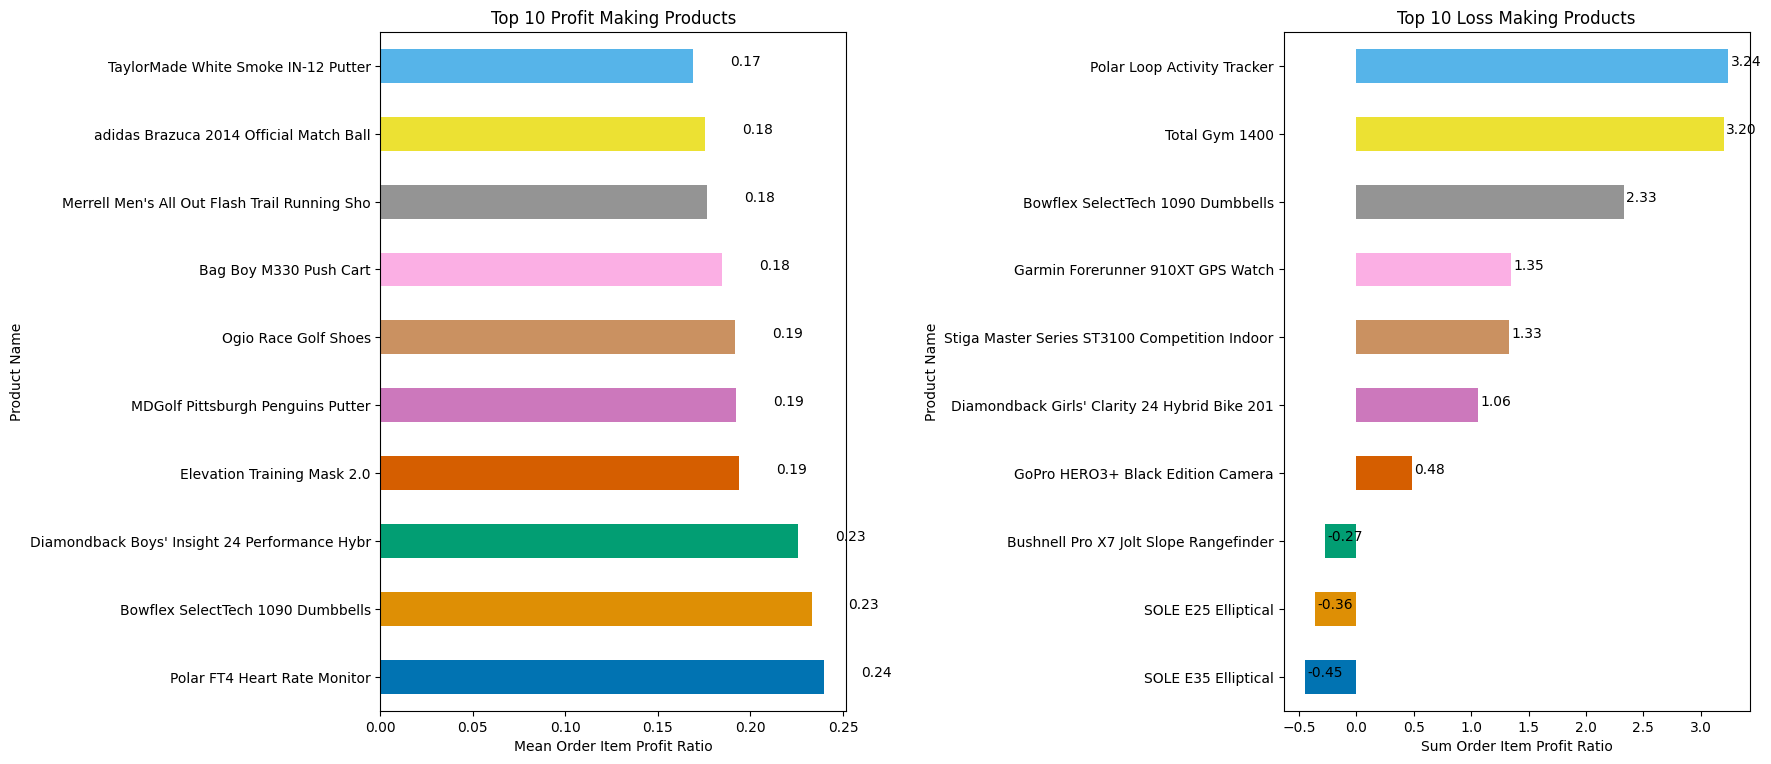

In [ ]:
# Set color blind-friendly color palette
color_palette = sns.color_palette('colorblind')

# Group by "Product Name" and calculate mean profit ratio for the top 10 profit-making products
top_10_products_profit_ratio = new_df.groupby("Product Name")['Order Item Profit Ratio'] \
    .mean().sort_values(ascending=False).head(10)

# Group by "Product Name" and calculate sum profit ratio for the top 10 loss-making products
top_10_loss_products_profit_ratio = new_df.groupby("Product Name")['Order Item Profit Ratio'] \
    .sum().sort_values(ascending=True).head(10)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Plot the top 10 profit-making products
top_10_products_profit_ratio.plot(kind='barh', color=color_palette, ax=axes[0], title='Top 10 Profit Making Products')
axes[0].set_xlabel('Mean Order Item Profit Ratio')

# Plot the top 10 loss-making products
top_10_loss_products_profit_ratio.plot(kind='barh', color=color_palette, ax=axes[1], title='Top 10 Loss Making Products')
axes[1].set_xlabel('Sum Order Item Profit Ratio')

# Add data labels
for ax in axes:
    for i, v in enumerate(ax.patches):
        ax.text(v.get_width() + 0.02, v.get_y() + v.get_height() / 2, f'{v.get_width():.2f}', color='black', ha='left')

# Adjust layout for better spacing
plt.tight_layout(pad=2)

# Show the plot
plt.show()

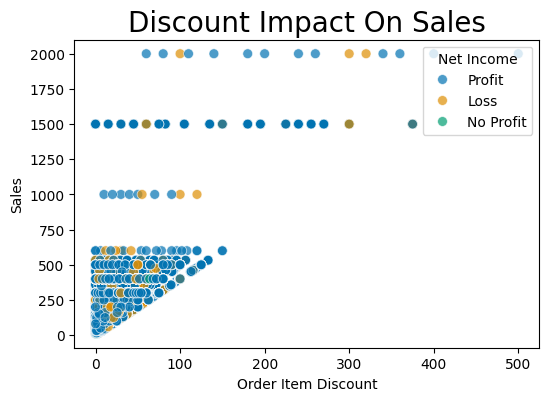

In [ ]:
# Set color-blind-friendly color palette
color_palette = sns.color_palette('colorblind')

# Set the figure size
plt.figure(figsize=(6, 4))

# Create a scatter plot with adjusted marker size and color-blind-friendly palette
sns.scatterplot(x=new_df['Order Item Discount'], y=new_df['Sales'], hue=new_df["Net Income"],
                palette=color_palette, alpha=0.7, s=50)  # Adjust marker size (s) as needed

# Set plot title and labels
plt.title('Discount Impact On Sales', size=20)
plt.xlabel('Order Item Discount')
plt.ylabel('Sales')

# Show the legend
plt.legend(title='Net Income', loc='upper right')

# Show the plot
plt.show()


In [ ]:
new_df[['Order Item Discount', 'Sales', 'Net Income']].describe()

,Order Item Discount,Sales
count,180519.000000,180519.000000
mean,20.664741,203.772096
std,21.800901,132.273077
min,0.000000,9.990000
25%,5.400000,119.980003
50%,14.000000,199.919998
75%,29.990000,299.950012
max,500.000000,1999.989990


In [ ]:
new_df[['Order Item Discount', 'Sales']].corr()

,Order Item Discount,Sales
Order Item Discount,1.000000,0.617438
Sales,0.617438,1.000000


In [ ]:
loss_making=new_df[new_df["Net Income"]== 'Loss']['Order Item Discount Rate'].mean()
profit_making=new_df[new_df["Net Income"]== 'Profit']['Order Item Discount Rate'].mean()
no_profit_making=new_df[new_df["Net Income"]== 'No Profit']['Order Item Discount Rate'].mean()

print(f'Discount On Loss Making Orders : {loss_making}')
print(f'Discount On Loss Making Orders : {profit_making}')
print(f'Discount On Loss Making Orders : {no_profit_making}')

Discount On Loss Making Orders : 0.1022223542650071
Discount On Loss Making Orders : 0.10157085198521551
Discount On Loss Making Orders : 0.09779949066100255


In [ ]:
loss_making - profit_making

0.0006515022797915909

Hypothesis test

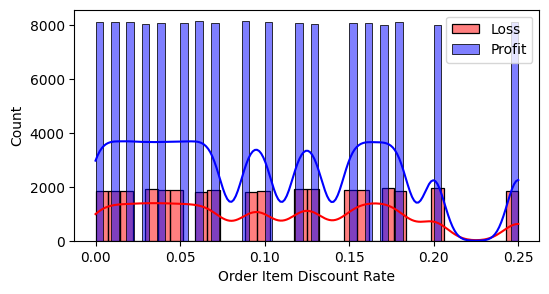

In [ ]:
from scipy import stats
stat_loss, p_value_loss = stats.shapiro(new_df[new_df["Net Income"] == 'Loss']['Order Item Discount Rate'])
stat_profit, p_value_profit = stats.shapiro(new_df[new_df["Net Income"] == 'Profit']['Order Item Discount Rate'])
# Check the normality of each group using the Shapiro-Wilk test
plt.figure(figsize=(6, 3))
sns.histplot(new_df[new_df["Net Income"] == 'Loss']['Order Item Discount Rate'], label='Loss', kde=True, color='red', alpha=0.5)
sns.histplot(new_df[new_df["Net Income"] == 'Profit']['Order Item Discount Rate'], label='Profit', kde=True, color='blue', alpha=0.5)

plt.legend()
plt.show()

In [ ]:
print(f'stat_loss: {stat_loss}')
print(f'stat_profit: {stat_profit}')
print(f'p_value_loss: {p_value_loss}')
print(f'p_value_profit: {p_value_profit}')

stat_loss: 0.9450550079345703
stat_profit: 0.9447224140167236
p_value_loss: 0.0
p_value_profit: 0.0


In [ ]:
# Perform the t-test if both groups are approximately normally distributed
if p_value_loss > 0.05 and p_value_profit > 0.05:
    t_stat, p_value = stats.ttest_ind(new_df[new_df["Net Income"] == 'Loss'][column_name],
                                       new_df[new_df["Net Income"] == 'Profit'][column_name],
                                       alternative='greater')
    print(f'The t-test p-value is: {p_value}')
else:
    print(f'One or both groups do not appear to be normally distributed. Consider non-parametric tests or transformations.')

One or both groups do not appear to be normally distributed. Consider non-parametric tests or transformations.


In [ ]:

from scipy.stats import mannwhitneyu

loss_data = new_df[new_df["Net Income"] == 'Loss']['Order Item Discount Rate']
profit_data = new_df[new_df["Net Income"] == 'Profit']['Order Item Discount Rate']

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(loss_data, profit_data, alternative='less')

# Print the results
print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")

Mann-Whitney U statistic: 2472964715.5
P-value: 0.9514254911697879


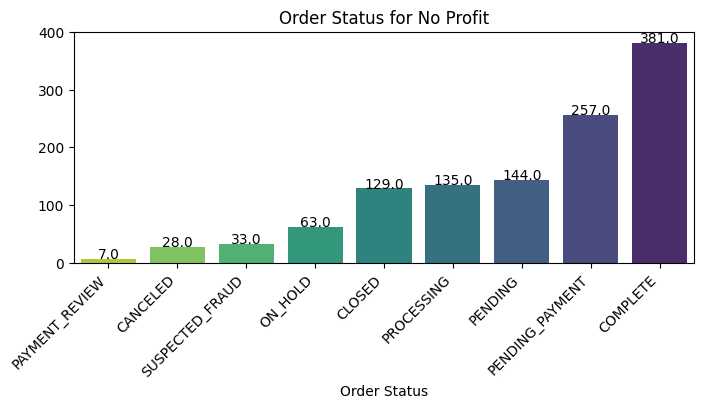

In [ ]:
plt.figure(figsize=(8,3))

data = new_df[new_df["Net Income"] == 'No Profit']
order_status_counts = data['Order Status'].value_counts().sort_values(ascending=False)

# Plotting bar chart
ax = sns.barplot(x=order_status_counts.index, y=order_status_counts.values, palette='viridis')

# Adding value labels inside the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 3.1), textcoords='offset points')

# Sort bars from largest to smallest
ax = ax.invert_xaxis()

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.title('Order Status for No Profit')
plt.show()

linear regression

In [ ]:
new_df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Segment,Department Name,Latitude,Longitude,Market,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,Net Income
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Consumer,Fitness,18.251453,-66.037056,Pacific Asia,Indonesia,20755,1/31/2018 22:56,77202,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,Smart watch,327.75,2/3/2018 22:56,Standard Class,Profit
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,Consumer,Fitness,18.279451,-66.037064,Pacific Asia,India,19492,1/13/2018 12:27,75939,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,Smart watch,327.75,1/18/2018 12:27,Standard Class,Loss
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,Consumer,Fitness,37.292233,-121.881279,Pacific Asia,India,19491,1/13/2018 12:06,75938,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,Smart watch,327.75,1/17/2018 12:06,Standard Class,Loss
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,Home Office,Fitness,34.125946,-118.291016,Pacific Asia,Australia,19490,1/13/2018 11:45,75937,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,Smart watch,327.75,1/16/2018 11:45,Standard Class,Profit
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Corporate,Fitness,18.253769,-66.037048,Pacific Asia,Australia,19489,1/13/2018 11:24,75936,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,Smart watch,327.75,1/15/2018 11:24,Standard Class,Profit


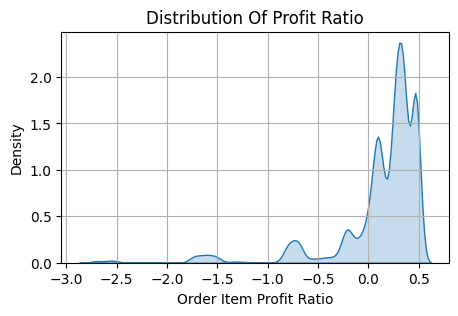

In [ ]:
# Target Variable Distribution
plt.figure(figsize=(5,3))
sns.kdeplot(new_df['Order Item Profit Ratio'], shade=True)
plt.title('Distribution Of Profit Ratio')
plt.grid();

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Feature Selection
features = new_df[["Days for shipping (real)", "Days for shipment (scheduled)",
                   "Benefit per order", "Sales per customer", "Late_delivery_risk",
                   "Order Item Discount Rate", "Order Item Product Price"]]
target = new_df["Order Item Profit Ratio"]

In [ ]:
features = new_df[['Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Late_delivery_risk', 'Order Item Discount Rate', 'Order Item Product Price']]

# Add a constant to the features (required for the VIF calculation)
features_with_constant = sm.add_constant(features)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = features_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(features_with_constant.values, i) for i in range(features_with_constant.shape[1])]

# Display the VIF values
print(vif_data)

                        Variable        VIF
0                          const  15.145464
1       Days for shipping (real)   3.047949
2  Days for shipment (scheduled)   2.960764
3              Benefit per order   1.018184
4             Sales per customer   2.688828
5             Late_delivery_risk   2.590106
6       Order Item Discount Rate   1.038299
7       Order Item Product Price   2.632329


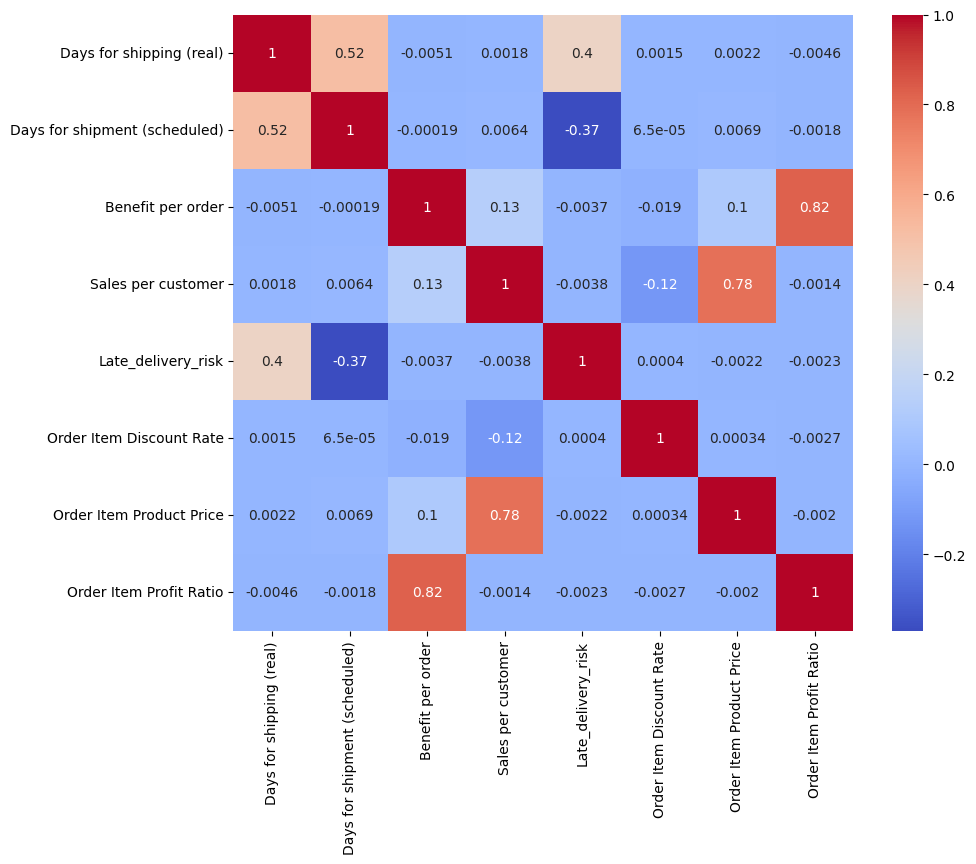

In [ ]:
plt.figure(figsize=(10,8))
correlation_matrix = pd.concat([features, target], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()


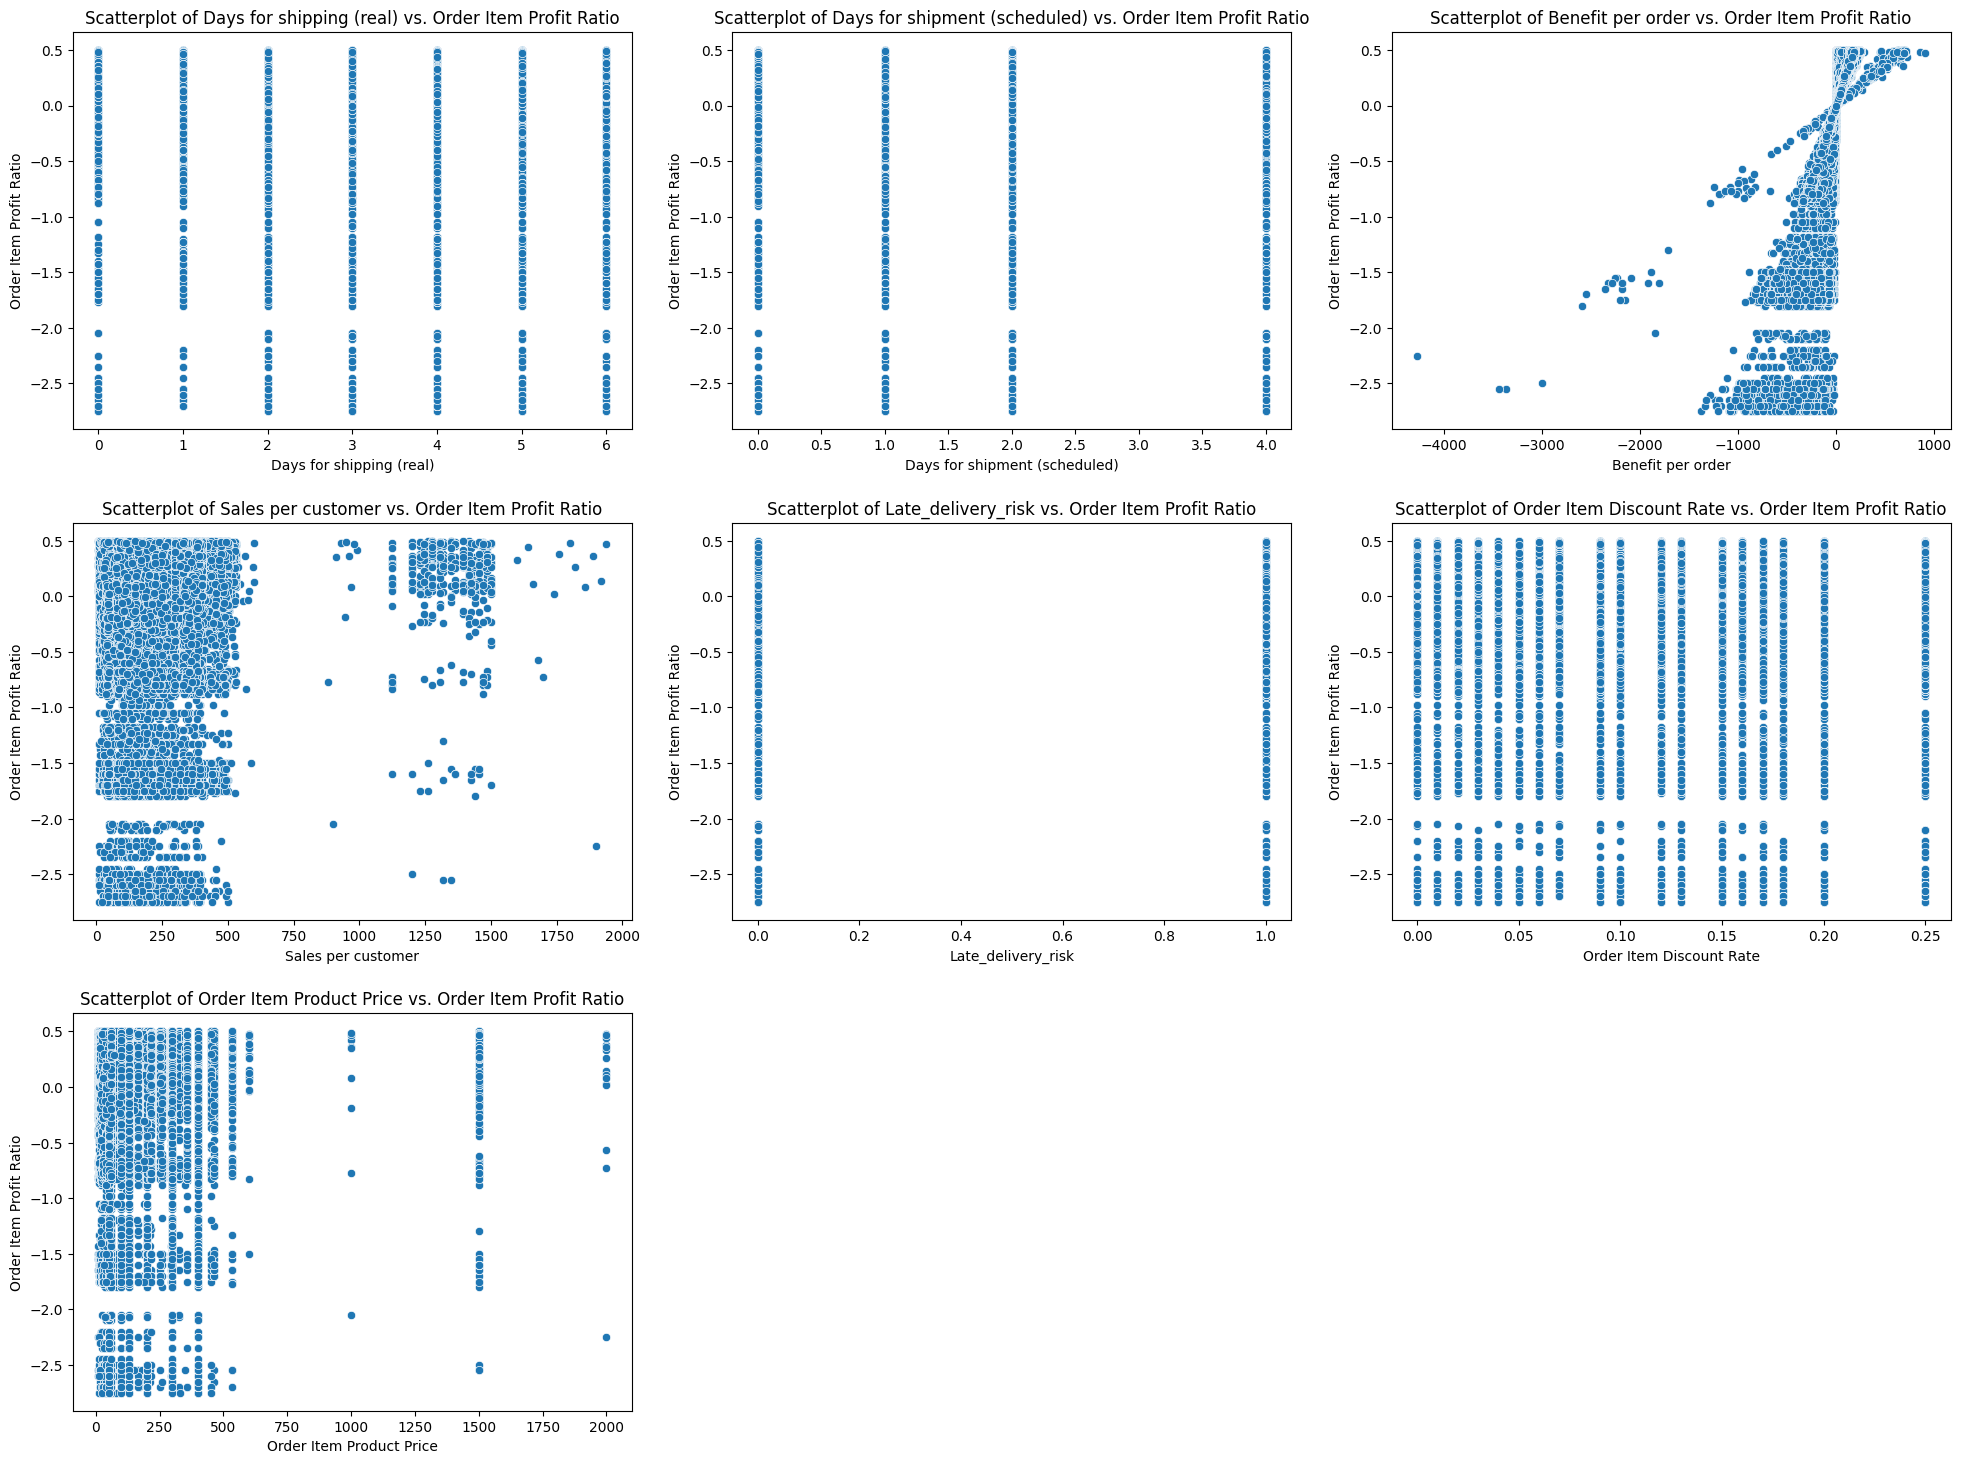

In [ ]:
# Calculate the number of subplots needed based on the number of features
num_features = len(features.columns)
num_rows = (num_features - 1) // 3 + 1

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 5 * num_rows))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Plot each feature against the target variable
for i, feature in enumerate(features.columns):
    sns.scatterplot(x=feature, y=target, data=new_df, ax=axes[i])
    axes[i].set_title(f'Scatterplot of {feature} vs. {target.name}')

# Remove any extra subplots
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout(pad=2)
plt.show()


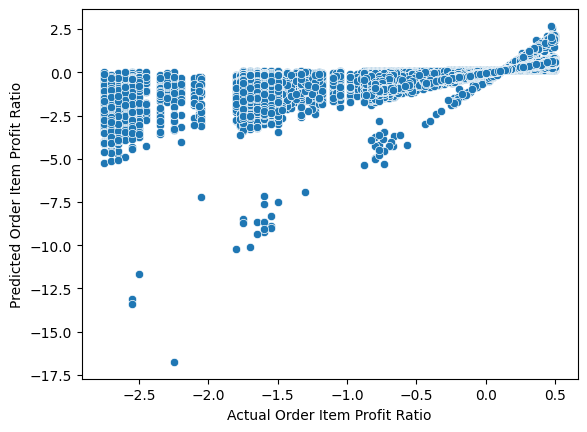

In [ ]:
model = LinearRegression()
model.fit(features, target)

sns.scatterplot(x=target, y=model.predict(features))
plt.xlabel("Actual Order Item Profit Ratio")
plt.ylabel("Predicted Order Item Profit Ratio")
plt.show()


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Convert scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

R-squared: 0.7258566181362911
Mean Squared Error: 0.05906138911239289
Mean Absolute Error: 0.13306756020658314


In [ ]:
# Model Interpretation
coefficients = pd.DataFrame({'Feature': X_train_scaled.columns, 'Coefficient': model.coef_})
intercept = model.intercept_

print('Coefficients:')
print(coefficients)
print(f'Intercept: {intercept}')

Coefficients:
                         Feature  Coefficient
0       Days for shipping (real)    -0.000288
1  Days for shipment (scheduled)    -0.000121
2              Benefit per order     0.389260
3             Sales per customer    -0.051023
4             Late_delivery_risk     0.000567
5       Order Item Discount Rate    -0.000485
6       Order Item Product Price     0.001152
Intercept: 0.12051241210217775


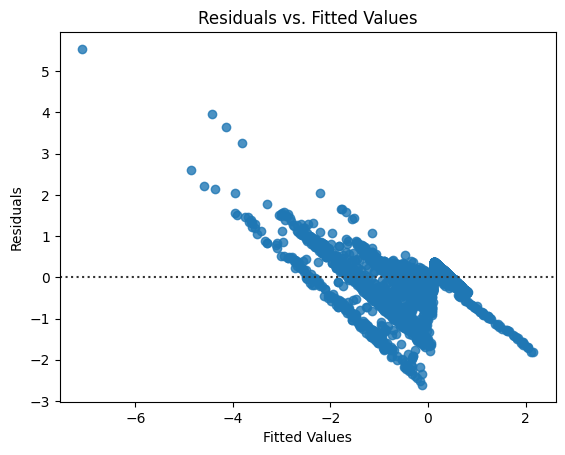

In [ ]:
# Model Validation
residuals = y_test - y_pred
sns.residplot(x=y_pred, y=residuals)
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()